In [3]:
import numpy as np
from tpot import TPOTRegressor
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
#!pip install tpot

In [5]:
train_data=pd.read_csv('train.csv')
train_data.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [6]:
test_data=pd.read_csv('test.csv')
test_data.head()

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01


In [7]:
test_data.nunique()

row_id                25080
cfips                  3135
first_day_of_month        8
dtype: int64

In [8]:
census=pd.read_csv('census_starter.csv')
census.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,pct_foreign_born_2017,pct_foreign_born_2018,pct_foreign_born_2019,pct_foreign_born_2020,pct_foreign_born_2021,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,16.4,2.1,2.0,2.3,2.3,2.1,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,20.6,3.2,3.4,3.7,3.4,3.5,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,6.7,2.7,2.5,2.7,2.6,2.6,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,7.9,1.0,1.4,1.5,1.6,1.1,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,9.3,4.5,4.4,4.5,4.4,4.5,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


In [9]:
submission=pd.read_csv('sample_submission.csv')
submission.head()

,row_id,microbusiness_density
0,1001_2022-11-01,3.817671
1,1003_2022-11-01,3.817671
2,1005_2022-11-01,3.817671
3,1007_2022-11-01,3.817671
4,1009_2022-11-01,3.817671


In [10]:
train_data.loc[train_data['cfips']==1001]

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
5,1001_2020-01-01,1001,Autauga County,Alabama,2020-01-01,2.969090,1242
6,1001_2020-02-01,1001,Autauga County,Alabama,2020-02-01,2.909326,1217
7,1001_2020-03-01,1001,Autauga County,Alabama,2020-03-01,2.933231,1227
8,1001_2020-04-01,1001,Autauga County,Alabama,2020-04-01,3.000167,1255
9,1001_2020-05-01,1001,Autauga County,Alabama,2020-05-01,3.004948,1257


In [11]:
train_data.nunique()

row_id                   122265
cfips                      3135
county                     1871
state                        51
first_day_of_month           39
microbusiness_density     97122
active                    19193
dtype: int64

In [13]:
#!pip install optuna

In [14]:
office=pd.read_csv('f1.csv')
office=office.drop(['Unnamed: 0'],axis=1)
office.head()

,ClientId,Fiscal_Year,Recency,Frequency,Monetary,year1,year2,year3,future,cntDate,Recency1,TranCount,OnlineTranCount,MobileTranCount,OnlineLoginCount,MobAppLoginCount
0,44310815,2021,244.0,1.0,1.999900,0.0,0.0,0.00,0.00000,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,42082678,2021,303.0,2.0,1.929903,0.0,0.0,0.00,0.00000,9.0,62.0,31.0,31.0,3.0,256.0,249.0
2,41525709,2021,456.0,1.0,0.999950,2.5,0.0,3.81,10.99945,1.0,0.0,5.0,0.0,0.0,0.0,0.0
3,42188701,2021,426.0,2.0,0.499975,0.0,0.0,0.00,0.00000,2.0,61.0,7.0,7.0,0.0,278.0,270.0
4,43436618,2021,244.0,1.0,0.169991,0.0,0.0,0.00,0.00000,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
office.Fiscal_Year.value_counts()

2021    40753
2018    21900
2019    19926
2020    18345
Name: Fiscal_Year, dtype: int64

In [16]:
of1=office.loc[office['Fiscal_Year']==2021]
of1.loc[of1['future']>0].shape

(12107, 16)

In [52]:
of2=office.loc[office['future']>0]
of2.Fiscal_Year.value_counts()

2021    12107
2020     9493
2018     7045
2019     6573
Name: Fiscal_Year, dtype: int64

In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt
office.shape

(100924, 16)

<AxesSubplot:>

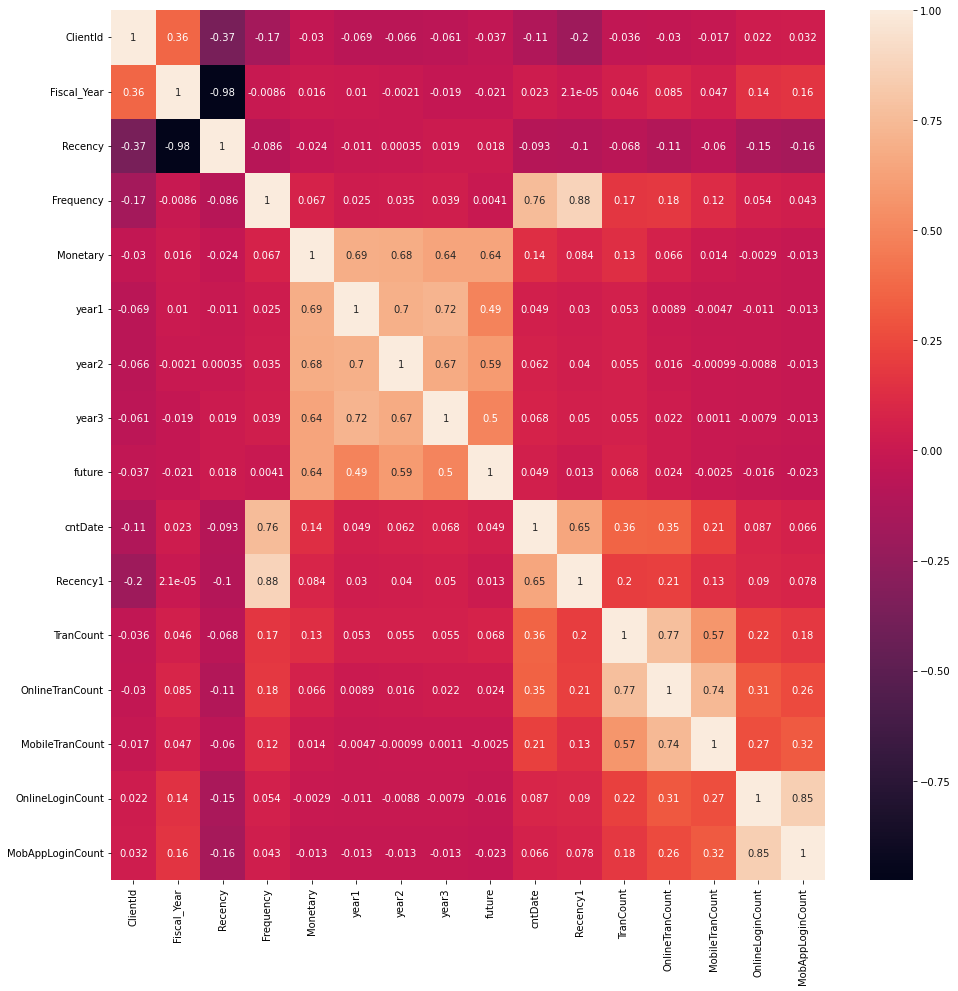

In [19]:
plt.figure(figsize=(16,16))
sns.heatmap(of2.corr(),annot=True)

In [20]:
#pip install xgboost

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import xgboost
import optuna


In [53]:
train=of2.loc[of2['Fiscal_Year']<2021]
test=of2.loc[of2['Fiscal_Year']==2021]
test=test.loc[test['future']>0].reset_index(drop=True)


In [54]:
X = train.drop(['future'], axis=1)
y = train['future']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [24]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -194.85947508042332

Generation 2 - Current best internal CV score: -194.85947508042332

Generation 3 - Current best internal CV score: -194.85947508042332

Generation 4 - Current best internal CV score: -194.85947508042332

Generation 5 - Current best internal CV score: -194.85947508042332

Best pipeline: LinearSVR(PCA(input_matrix, iterated_power=6, svd_solver=randomized), C=1.0, dual=True, epsilon=0.1, loss=epsilon_insensitive, tol=0.1)
-99.05366673877847


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [25]:
y_pred=tpot.predict(X_test)

In [26]:
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('score: ',r2_score(y_test, y_pred))

MSE:  99.05366673877847
RMSE:  9.95257086077655
score:  0.7792159666946896


In [29]:
smape(y_test,y_pred)

187.3454544157855

In [30]:
X_future = test.drop(['future'], axis=1)
y_future = test['future']

In [31]:
y_pred = tpot.predict(X_future)

In [32]:
print('MSE: ', mean_squared_error(y_future, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_future, y_pred)))
print('score: ',r2_score(y_future, y_pred))

MSE:  161.55737016704808
RMSE:  12.710522025748906
score:  -0.1388199530032046


In [33]:
smape(y_future,y_pred)

158.74271415994434

In [55]:
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [56]:
y_pred = model.predict(X_test)


In [57]:
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  1036.0317573596346
RMSE:  32.18744720165976


In [153]:
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1, 1000)
    }
    model = xgboost.XGBRegressor(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

In [154]:
study = optuna.create_study(direction='minimize', study_name='regression')
study.optimize(objective, n_trials=100)

[I 2023-02-12 16:18:12,043] A new study created in memory with name: regression
[I 2023-02-12 16:18:14,893] Trial 0 finished with value: 279.9648296222861 and parameters: {'max_depth': 5, 'learning_rate': 0.9859126993731125, 'n_estimators': 170, 'min_child_weight': 2, 'gamma': 0.3133764274014959, 'subsample': 0.9092136627035003, 'colsample_bytree': 0.351295577266555, 'reg_alpha': 0.7245103530069888, 'reg_lambda': 0.7369699178905912, 'random_state': 1000}. Best is trial 0 with value: 279.9648296222861.
[I 2023-02-12 16:18:16,606] Trial 1 finished with value: 165.4940658811627 and parameters: {'max_depth': 1, 'learning_rate': 0.17691143081036317, 'n_estimators': 253, 'min_child_weight': 8, 'gamma': 0.8342428527501452, 'subsample': 0.7109803268618995, 'colsample_bytree': 0.1637906814938802, 'reg_alpha': 0.5654828229472882, 'reg_lambda': 0.03500053328090885, 'random_state': 420}. Best is trial 1 with value: 165.4940658811627.
[I 2023-02-12 16:18:20,656] Trial 2 finished with value: 309.232

[I 2023-02-12 16:19:23,857] Trial 19 finished with value: 96.55360972920056 and parameters: {'max_depth': 2, 'learning_rate': 0.12580158928816548, 'n_estimators': 56, 'min_child_weight': 4, 'gamma': 0.708813185345611, 'subsample': 0.8005900608219312, 'colsample_bytree': 0.36337387954221945, 'reg_alpha': 0.9738909857621774, 'reg_lambda': 0.15775092970492596, 'random_state': 754}. Best is trial 19 with value: 96.55360972920056.
[I 2023-02-12 16:19:24,497] Trial 20 finished with value: 210.09259628741515 and parameters: {'max_depth': 3, 'learning_rate': 0.015861431742618268, 'n_estimators': 73, 'min_child_weight': 4, 'gamma': 0.4842074937553993, 'subsample': 0.8656725323643062, 'colsample_bytree': 0.35859952782870447, 'reg_alpha': 0.995065667431182, 'reg_lambda': 0.32313701329023037, 'random_state': 966}. Best is trial 19 with value: 96.55360972920056.
[I 2023-02-12 16:19:25,593] Trial 21 finished with value: 104.79231560205591 and parameters: {'max_depth': 1, 'learning_rate': 0.134166221

[I 2023-02-12 16:19:52,812] Trial 38 finished with value: 285.9378423734369 and parameters: {'max_depth': 3, 'learning_rate': 0.2426772034287224, 'n_estimators': 288, 'min_child_weight': 2, 'gamma': 0.8426757055512639, 'subsample': 0.602725911902864, 'colsample_bytree': 0.24993979958257645, 'reg_alpha': 0.7882324388785017, 'reg_lambda': 0.17350192095594225, 'random_state': 489}. Best is trial 32 with value: 77.11875697371795.
[I 2023-02-12 16:19:53,495] Trial 39 finished with value: 237.99234988461535 and parameters: {'max_depth': 1, 'learning_rate': 0.15869443143110334, 'n_estimators': 115, 'min_child_weight': 1, 'gamma': 0.23984215228203287, 'subsample': 0.6943583644994936, 'colsample_bytree': 0.44428157018716363, 'reg_alpha': 0.869935920069127, 'reg_lambda': 0.06405594715216703, 'random_state': 634}. Best is trial 32 with value: 77.11875697371795.
[I 2023-02-12 16:19:55,997] Trial 40 finished with value: 204.75470042266522 and parameters: {'max_depth': 5, 'learning_rate': 0.08374177

[I 2023-02-12 16:20:29,362] Trial 57 finished with value: 121.73576743396349 and parameters: {'max_depth': 1, 'learning_rate': 0.10730465696252534, 'n_estimators': 739, 'min_child_weight': 5, 'gamma': 0.6337329845895892, 'subsample': 0.766416222931681, 'colsample_bytree': 0.2157272515622633, 'reg_alpha': 0.909113732714687, 'reg_lambda': 0.0922658401083993, 'random_state': 449}. Best is trial 32 with value: 77.11875697371795.
[I 2023-02-12 16:20:32,255] Trial 58 finished with value: 237.13658361754173 and parameters: {'max_depth': 3, 'learning_rate': 0.15640921149656584, 'n_estimators': 371, 'min_child_weight': 3, 'gamma': 0.6053612070736526, 'subsample': 0.8747481850427, 'colsample_bytree': 0.33931944354585214, 'reg_alpha': 0.9588794321254873, 'reg_lambda': 0.045975877023021694, 'random_state': 766}. Best is trial 32 with value: 77.11875697371795.
[I 2023-02-12 16:20:32,853] Trial 59 finished with value: 91.41501055868808 and parameters: {'max_depth': 2, 'learning_rate': 0.101484471093

[I 2023-02-12 16:20:54,747] Trial 76 finished with value: 128.46141498576537 and parameters: {'max_depth': 2, 'learning_rate': 0.09683969031474084, 'n_estimators': 211, 'min_child_weight': 5, 'gamma': 0.6297960851706603, 'subsample': 0.9271337627587084, 'colsample_bytree': 0.43562564135408516, 'reg_alpha': 0.9729447071427265, 'reg_lambda': 0.11521556942997824, 'random_state': 1}. Best is trial 32 with value: 77.11875697371795.
[I 2023-02-12 16:20:55,297] Trial 77 finished with value: 107.26929079374865 and parameters: {'max_depth': 1, 'learning_rate': 0.038371320303085266, 'n_estimators': 97, 'min_child_weight': 4, 'gamma': 0.47678913047341753, 'subsample': 0.9973124422357026, 'colsample_bytree': 0.33594907506752536, 'reg_alpha': 0.9996819239288283, 'reg_lambda': 0.0165683632873455, 'random_state': 372}. Best is trial 32 with value: 77.11875697371795.
[I 2023-02-12 16:20:56,359] Trial 78 finished with value: 168.49634312618787 and parameters: {'max_depth': 3, 'learning_rate': 0.1840765

[I 2023-02-12 16:21:22,059] Trial 95 finished with value: 103.13830905317147 and parameters: {'max_depth': 2, 'learning_rate': 0.1459725975110241, 'n_estimators': 139, 'min_child_weight': 4, 'gamma': 0.6887662751623885, 'subsample': 0.8421302172697593, 'colsample_bytree': 0.353047791795387, 'reg_alpha': 0.9260403835982358, 'reg_lambda': 0.07883530786159068, 'random_state': 701}. Best is trial 32 with value: 77.11875697371795.
[I 2023-02-12 16:21:22,958] Trial 96 finished with value: 117.24660355677088 and parameters: {'max_depth': 1, 'learning_rate': 0.1665457862486454, 'n_estimators': 174, 'min_child_weight': 5, 'gamma': 0.6149837802970338, 'subsample': 0.7522740989153139, 'colsample_bytree': 0.3145910820310909, 'reg_alpha': 0.997494340870946, 'reg_lambda': 0.12918290139898203, 'random_state': 887}. Best is trial 32 with value: 77.11875697371795.
[I 2023-02-12 16:21:23,585] Trial 97 finished with value: 117.90391759424166 and parameters: {'max_depth': 1, 'learning_rate': 0.03252813041

In [28]:
def smape(actual,forecast):return 100/len(actual)*np.sum(2*np.abs(forecast-actual)/(np.abs(actual)+np.abs(forecast)))

In [156]:
print('Best parameters', study.best_params)

Best parameters {'max_depth': 1, 'learning_rate': 0.14691943833051463, 'n_estimators': 129, 'min_child_weight': 3, 'gamma': 0.6831897268299914, 'subsample': 0.7872885858351062, 'colsample_bytree': 0.3374116839895714, 'reg_alpha': 0.8478353260021152, 'reg_lambda': 0.08416878306161074, 'random_state': 703}


In [58]:
model = xgboost.XGBRegressor(max_depth=1, learning_rate=0.14691943833051463, n_estimators=129, min_child_weight=3, gamma=0.6831897268299914, subsample=0.7872885858351062, colsample_bytree=0.3374116839895714, reg_alpha=0.8478353260021152, reg_lambda=0.08416878306161074, random_state=703)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3374116839895714, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.6831897268299914, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.14691943833051463, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=129, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=703, ...)

In [59]:
y_pred = model.predict(X_test)

In [60]:
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('score: ',r2_score(y_test, y_pred))

MSE:  803.3371234537883
RMSE:  28.34320242057676
score:  0.3553565011071136


In [61]:
smape(y_test,y_pred)

108.421612373163

In [62]:
X_future = test.drop(['future'], axis=1)
y_future = test['future']

In [63]:
y_pred = model.predict(X_future)

In [64]:
print('MSE: ', mean_squared_error(y_future, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_future, y_pred)))
print('score: ',r2_score(y_future, y_pred))

MSE:  409.24602637811324
RMSE:  20.229830112438247
score:  -1.884780434620681


In [65]:
smape(y_future,abs(y_pred))

122.37924867087251

In [46]:
test['pred']=abs(y_pred)

In [51]:
test.head(50)

,ClientId,Fiscal_Year,Recency,Frequency,Monetary,year1,year2,year3,future,cntDate,Recency1,TranCount,OnlineTranCount,MobileTranCount,OnlineLoginCount,MobAppLoginCount,pred,diff
0,41525709,2021,456.0,1.0,0.999950,2.500000,0.000000,3.810000,10.999450,1.0,0.0,5.0,0.0,0.0,0.0,0.0,1.707735,-9.291715
1,41485796,2021,426.0,1.0,0.499975,0.000000,0.000000,0.000000,0.999950,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.707735,0.707785
2,42237750,2021,244.0,8.0,0.319984,0.000000,0.000000,0.000000,0.319984,16.0,212.0,2.0,0.0,0.0,0.0,0.0,2.706483,2.386499
3,40778641,2021,395.0,1.0,0.009999,0.500000,0.000000,0.000000,0.319984,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.707735,1.387751
4,41965892,2021,456.0,4.0,19.801986,0.000000,0.000000,211.348914,24.507601,7.0,123.0,7.0,7.0,0.0,10.0,0.0,26.282267,1.774665
5,42412316,2021,334.0,1.0,1.499925,0.000000,0.000000,0.000000,0.999950,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.707735,0.707785
6,42159965,2021,244.0,11.0,12.349383,0.000000,0.000000,0.000000,4.449777,21.0,304.0,26.0,26.0,2.0,121.0,29.0,5.568409,1.118632
7,44053278,2021,275.0,1.0,0.199990,0.000000,0.000000,0.000000,0.099995,2.0,0.0,4.0,0.0,0.0,0.0,0.0,1.707735,1.607740
8,42223259,2021,426.0,2.0,0.099995,0.000000,0.000000,0.000000,0.049998,2.0,61.0,2.0,0.0,0.0,0.0,0.0,1.707735,1.657737
9,40428077,2021,334.0,1.0,0.999950,52.907823,0.000000,41.778428,4.999750,1.0,0.0,8.0,0.0,0.0,0.0,0.0,24.831860,19.832109


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diff'>

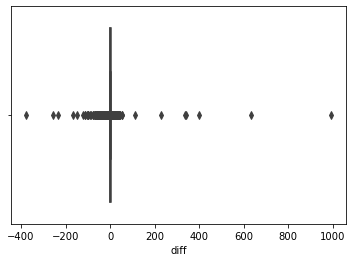

In [48]:
test['diff']=test['pred']-test['future']
sns.boxplot(test['diff'])

In [49]:
test['diff'].describe()

count    12107.000000
mean         1.070517
std         14.679392
min       -376.192142
25%          0.707785
50%          1.637738
75%          2.611806
max        989.746885
Name: diff, dtype: float64

In [145]:
t1=test.loc[test['future']>0]
t1['diff'].describe()

count    12107.000000
mean         3.922812
std         20.561845
min       -265.041583
25%          0.536503
50%          1.721703
75%          4.289791
max       1073.816343
Name: diff, dtype: float64

In [146]:
t1.head()

,ClientId,Fiscal_Year,Recency,Frequency,Monetary,year1,year2,year3,future,cntDate,Recency1,TranCount,OnlineTranCount,MobileTranCount,OnlineLoginCount,MobAppLoginCount,pred,diff
0,41525709,2021,456.0,1.0,0.999950,2.5,0.0,3.810000,10.999450,1.0,0.0,5.0,0.0,0.0,0.0,0.0,4.070733,-6.928717
1,41485796,2021,426.0,1.0,0.499975,0.0,0.0,0.000000,0.999950,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.737068,0.737118
2,42237750,2021,244.0,8.0,0.319984,0.0,0.0,0.000000,0.319984,16.0,212.0,2.0,0.0,0.0,0.0,0.0,-2.093080,-2.413064
3,40778641,2021,395.0,1.0,0.009999,0.5,0.0,0.000000,0.319984,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.087946,0.767962
4,41965892,2021,456.0,4.0,19.801986,0.0,0.0,211.348914,24.507601,7.0,123.0,7.0,7.0,0.0,10.0,0.0,-52.406498,-76.914099


In [147]:
t1.shape

(12107, 18)

In [99]:
test.shape

(40753, 18)